# Final intermediate model: predict n_sick & calls

In [48]:
import sys
print(sys.executable)

/Users/kata/opt/anaconda3/bin/python


In [60]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [50]:
# load data
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week
# change type to not get error
df['week'] = df['week'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1152 non-null   datetime64[ns]
 1   n_sick       1152 non-null   int64         
 2   calls        1152 non-null   float64       
 3   n_duty       1152 non-null   int64         
 4   n_sby        1152 non-null   int64         
 5   sby_need     1152 non-null   float64       
 6   dafted       1152 non-null   float64       
 7   year         1152 non-null   int64         
 8   month        1152 non-null   int64         
 9   day_of_week  1152 non-null   int64         
 10  week         1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 108.0 KB


In [51]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.n_sick

#### train test split

In [52]:
# train test split
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]


x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### Predict n_sick with XGBoost

In [53]:
model = XGBRegressor()

In [54]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
pred = model.predict(x_test)

In [16]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()


In [30]:
# create df to compare data
y_new = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
y_new = y_new.drop(['index'], axis=1)
y_new['predicted'] = y_new[0]
y_new = y_new.drop([0], axis=1)

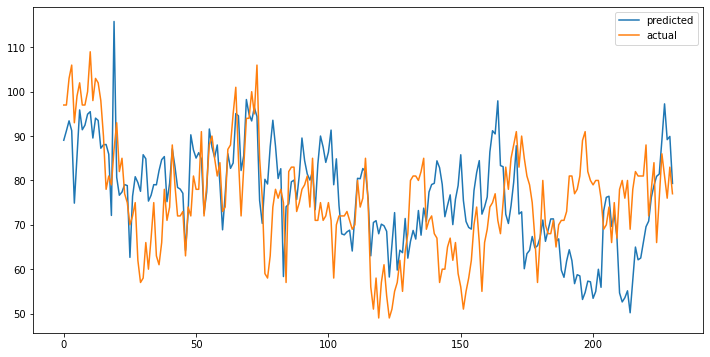

In [33]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(y_new['predicted'], label='predicted')
plt.plot(y_new['n_sick'], label='actual')
plt.legend()
plt.show()


In [58]:
# calculate MSE
mse_xgboost = mean_squared_error(y_new['n_sick'], y_new['predicted'])
print('The MSE for XGBoost is:', mse_xgboost)

The MSE for XGBoost is: 167.96080964734261


### Predict with n_sick with Random Forest

In [61]:
model = RandomForestRegressor()

In [62]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
pred = model.predict(x_test)

In [66]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [67]:
# create df to compare data
y_new = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
y_new = y_new.drop(['index'], axis=1)
y_new['predicted'] = y_new[0]
y_new = y_new.drop([0], axis=1)

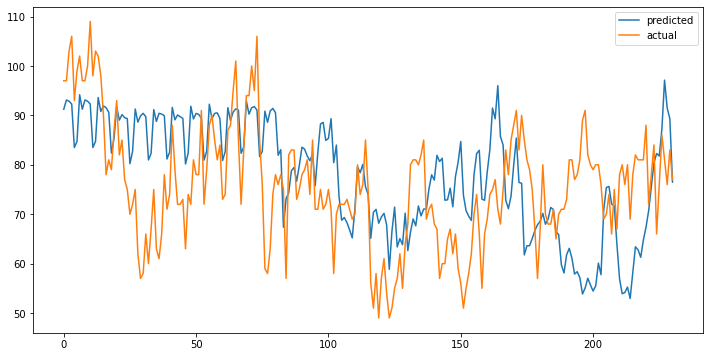

In [69]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(y_new['predicted'], label='predicted')
plt.plot(y_new['n_sick'], label='actual')
plt.legend()
plt.show()

In [70]:
# calculate MSE
mse_rf = mean_squared_error(y_new['n_sick'], y_new['predicted'])
print('The MSE for Random Forest is:', mse_rf)

The MSE for Random Forest is: 191.87770606060607


### Predict calls with XGBoost

In [71]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.calls

In [72]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

In [73]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [74]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [75]:
# create df to compare data
y_new = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
y_new = y_new.drop(['index'], axis=1)
y_new['predicted'] = y_new[0]
y_new = y_new.drop([0], axis=1)

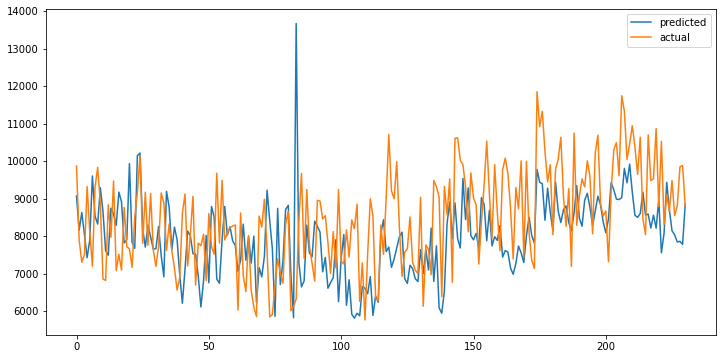

In [77]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(y_new['predicted'], label='predicted')
plt.plot(y_new['calls'], label='actual')
plt.legend()
plt.show()

In [79]:
# calculate MSE
mse_xgboost = mean_squared_error(y_new['calls'], y_new['predicted'])
print('The MSE for XGBoost is:', mse_xgboost)

The MSE for XGBoost is: 2092620.6058171096


### Predict calls with Random Forest

In [80]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [81]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [82]:
# create df to compare data
y_new = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
y_new = y_new.drop(['index'], axis=1)
y_new['predicted'] = y_new[0]
y_new = y_new.drop([0], axis=1)

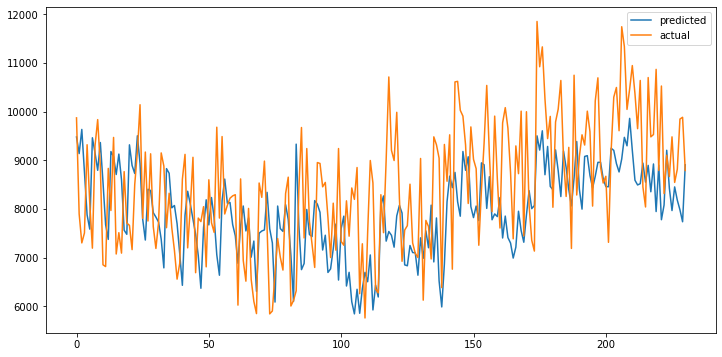

In [83]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(y_new['predicted'], label='predicted')
plt.plot(y_new['calls'], label='actual')
plt.legend()
plt.show()

In [84]:
# calculate MSE
mse_rf = mean_squared_error(y_new['calls'], y_new['predicted'])
print('The MSE for XGBoost is:', mse_rf)

The MSE for XGBoost is: 1747659.4747168832


## Predict sby_need with n_sick!

133355.41781237785